<a href="https://colab.research.google.com/github/guedesiw/air-quality-india/blob/master/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy
import gzip
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = "http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-01-21/data/listings.csv.gz"
response = requests.get(url)
bytes_io = io.BytesIO(response.content)
with gzip.open(bytes_io, 'rt') as read_file:
    ds = pd.read_csv(read_file)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
print(ds.shape)

(34754, 106)


In [0]:
ds.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20200121213543,2020-01-22,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival...,- large balcony which looks out on pedestrian ...,Pls note that special rates apply for Carnival...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It's like your ...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,...,$63.00,5,30,5,5,1125,1125,5.0,1125.0,6 weeks ago,t,1,7,37,312,2020-01-22,246,26,2010-07-15,2019-12-22,93.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.12
1,21280,https://www.airbnb.com/rooms/21280,20200121213543,2020-01-22,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,Immaculately renovated top-floor apartment in ...,Immaculately renovated top-floor apartment ove...,none,This is the best neighborhood in Zona Sul. Fo...,NaN,The new metro station is just a few steps away...,"This is an older ""Art Deco"" style building, so...",Someone will be there at check in and check ou...,This is a booking agreement for rental of a tw...,NaN,NaN,https://a0.muscache.com/im/pictures/60851312/b...,NaN,81163,https://www.airbnb.com/users/show/81163,Jules,2010-02-14,"Chicago, Illinois, United States",Hi I am Jules and I have a beautiful apartment...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/81163/profile...,https://a0.muscache.com/im/users/81163/profile...,Ipanema,0.0,0.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,...,$0.00,5,30,5,5,30,30,5.0,30.0,3 weeks ago,t,6,12,12,12,2020-01-22,89,1,2014-02-14,2020-01-04,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.23
2,25026,https://www.airbnb.com/rooms/25026,20200121213543,2020-01-22,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...

In [0]:
ds = ds.drop(['id', 'listing_url','scrape_id', 'last_scraped', 'name','summary', 'space', 'description', 'neighborhood_overview', 'notes','transit','access','interaction','house_rules',
              'thumbnail_url','medium_url', 'picture_url','xl_picture_url','host_id','host_url','host_name', 'host_about','host_thumbnail_url','host_picture_url', 'host_verifications',
              'calendar_last_scraped','first_review','last_review','license','jurisdiction_names', 'cancellation_policy','zipcode'], axis=1)
ds.head(5)

,experiences_offered,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,none,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within an hour,100%,NaN,t,Copacabana,2.0,2.0,t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,NaN,Rio de Janeiro,Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.96592,-43.17896,t,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$332.00,NaN,NaN,$0.00,$378.00,2,$63.00,5,30,5,5,1125,1125,5.0,1125.0,6 weeks ago,t,1,7,37,312,246,26,93.0,10.0,10.0,10.0,10.0,10.0,9.0,f,t,f,f,f,1,1,0,0,2.12
1,none,2010-02-14,"Chicago, Illinois, United States",within an hour,100%,NaN,f,Ipanema,0.0,0.0,t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,NaN,Rio de Janeiro,RJ,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.98467,-43.19611,t,Apartment,Entire home/apt,6,2.0,2.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$336.00,"$3,920.00","$13,836.00","$2,098.00",$210.00,6,$0.00,5,30,5,5,30,30,5.0,30.0,3 weeks ago,t,6,12,12,12,89,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,f,f,1,1,0,0,1.23
2,none,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within a day,86%,NaN,f,Copacabana,3.0,3.0,t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,NaN,Rio de Janeiro,Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.97712,-43.19045,t,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$159.00,NaN,NaN,"$1,000.00",$250.00,2,$45.00,7,60,7,7,60,60,7.0,60.0,3 days ago,t,13,16,16,21,237,15,94.0,9.0,10.0,9.0,10.0,10.0,9.0,f,f,f,t,t,3,3,0,0,2.02
3,none,2010-05-31,"Rio de Janeiro, Rio de Janeiro, Brazil",within an hour,100%,NaN,t,Ipanema,1.0,1.0,t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,NaN,Rio de Janeiro,RJ,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.98302,-43.21427,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$273.00,NaN,NaN,$0.00,$84.00,2,$42.00,2,1125,2,5,1125,1125,2.0,1125.0,2 weeks ago,t,0,12,40,130,277,39,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,f,f,1,1,0,0,2.39
4,none,2010-06-27,"San Carlos de Bariloche, Rio Negro, Argentina",within an hour,100%,NaN,f,Ipanema,1.0,1.0,t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Ipanema,Ipanema,NaN,Rio de Janeiro,Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.98816,-43.19359,t,Apartment,Entire home/apt,2,1.5,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$378.00,NaN,"$9,652.00","$1,049.00",$172.00,2,$63.00,2,89,2,2,89,89,2.0,89.0,4 months ago,t,2,13,24,108,174,35,94.0,10.0,9.0,10.0,

In [0]:
print(ds.shape)

(34754, 74)


In [0]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34754 entries, 0 to 34753
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   experiences_offered                           34754 non-null  object 
 1   host_since                                    34749 non-null  object 
 2   host_location                                 34577 non-null  object 
 3   host_response_time                            22847 non-null  object 
 4   host_response_rate                            22847 non-null  object 
 5   host_acceptance_rate                          0 non-null      float64
 6   host_is_superhost                             34749 non-null  object 
 7   host_neighbourhood                            22505 non-null  object 
 8   host_listings_count                           34749 non-null  float64
 9   host_total_listings_count                     34749 non-null 

In [0]:
ds = ds.drop(['neighbourhood_group_cleansed', 'host_acceptance_rate'], axis=1)

In [0]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34754 entries, 0 to 34753
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   experiences_offered                           34754 non-null  object 
 1   host_since                                    34749 non-null  object 
 2   host_location                                 34577 non-null  object 
 3   host_response_time                            22847 non-null  object 
 4   host_response_rate                            22847 non-null  object 
 5   host_is_superhost                             34749 non-null  object 
 6   host_neighbourhood                            22505 non-null  object 
 7   host_listings_count                           34749 non-null  float64
 8   host_total_listings_count                     34749 non-null  float64
 9   host_has_profile_pic                          34749 non-null 

In [0]:
ds = ds.drop(['square_feet','weekly_price','monthly_price'], axis=1)

In [0]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34754 entries, 0 to 34753
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   experiences_offered                           34754 non-null  object 
 1   host_since                                    34749 non-null  object 
 2   host_location                                 34577 non-null  object 
 3   host_response_time                            22847 non-null  object 
 4   host_response_rate                            22847 non-null  object 
 5   host_is_superhost                             34749 non-null  object 
 6   host_neighbourhood                            22505 non-null  object 
 7   host_listings_count                           34749 non-null  float64
 8   host_total_listings_count                     34749 non-null  float64
 9   host_has_profile_pic                          34749 non-null 

In [0]:
ds = ds.dropna()
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8916 entries, 0 to 34298
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   experiences_offered                           8916 non-null   object 
 1   host_since                                    8916 non-null   object 
 2   host_location                                 8916 non-null   object 
 3   host_response_time                            8916 non-null   object 
 4   host_response_rate                            8916 non-null   object 
 5   host_is_superhost                             8916 non-null   object 
 6   host_neighbourhood                            8916 non-null   object 
 7   host_listings_count                           8916 non-null   float64
 8   host_total_listings_count                     8916 non-null   float64
 9   host_has_profile_pic                          8916 non-null   

In [0]:
def remove_simbolo_monetario(x):
    a =  x[1:] #remove apenas um caracter
    result = ""
    for i in a:
        if i.isdigit() is True:
            result = result + i
    return result #retorna os digíto, sem o símbolo

ds["price"] = pd.to_numeric(ds["price"].apply(remove_simbolo_monetario), errors= "ignore")
ds["extra_people"] = pd.to_numeric(ds["extra_people"].apply(remove_simbolo_monetario), errors= "ignore")

In [0]:
ds['bed_type'] = ds.bed_type.astype('category')
ds['bed_type'].cat.categories
ds['bed_type'] = ds['bed_type'].cat.codes

In [0]:
ds['room_type'] = ds.room_type.astype('category')
ds['room_type'].cat.categories
ds['room_type'] = ds['room_type'].cat.codes
ds.head(5)

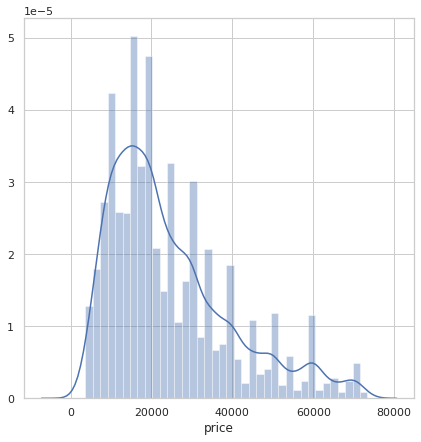

In [0]:
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(ds["price"])

In [0]:
q1 = ds["price"].quantile(0.25)
q3 = ds["price"].quantile(0.75)
IQR = q3 - q1
IF = q1 - (1.5 * IQR)
OF = q3 + (1.5 * IQR)

In [0]:
ds = ds[~((ds["price"] < IF) | (ds["price"] > OF))]
ds.shape

(8161, 69)

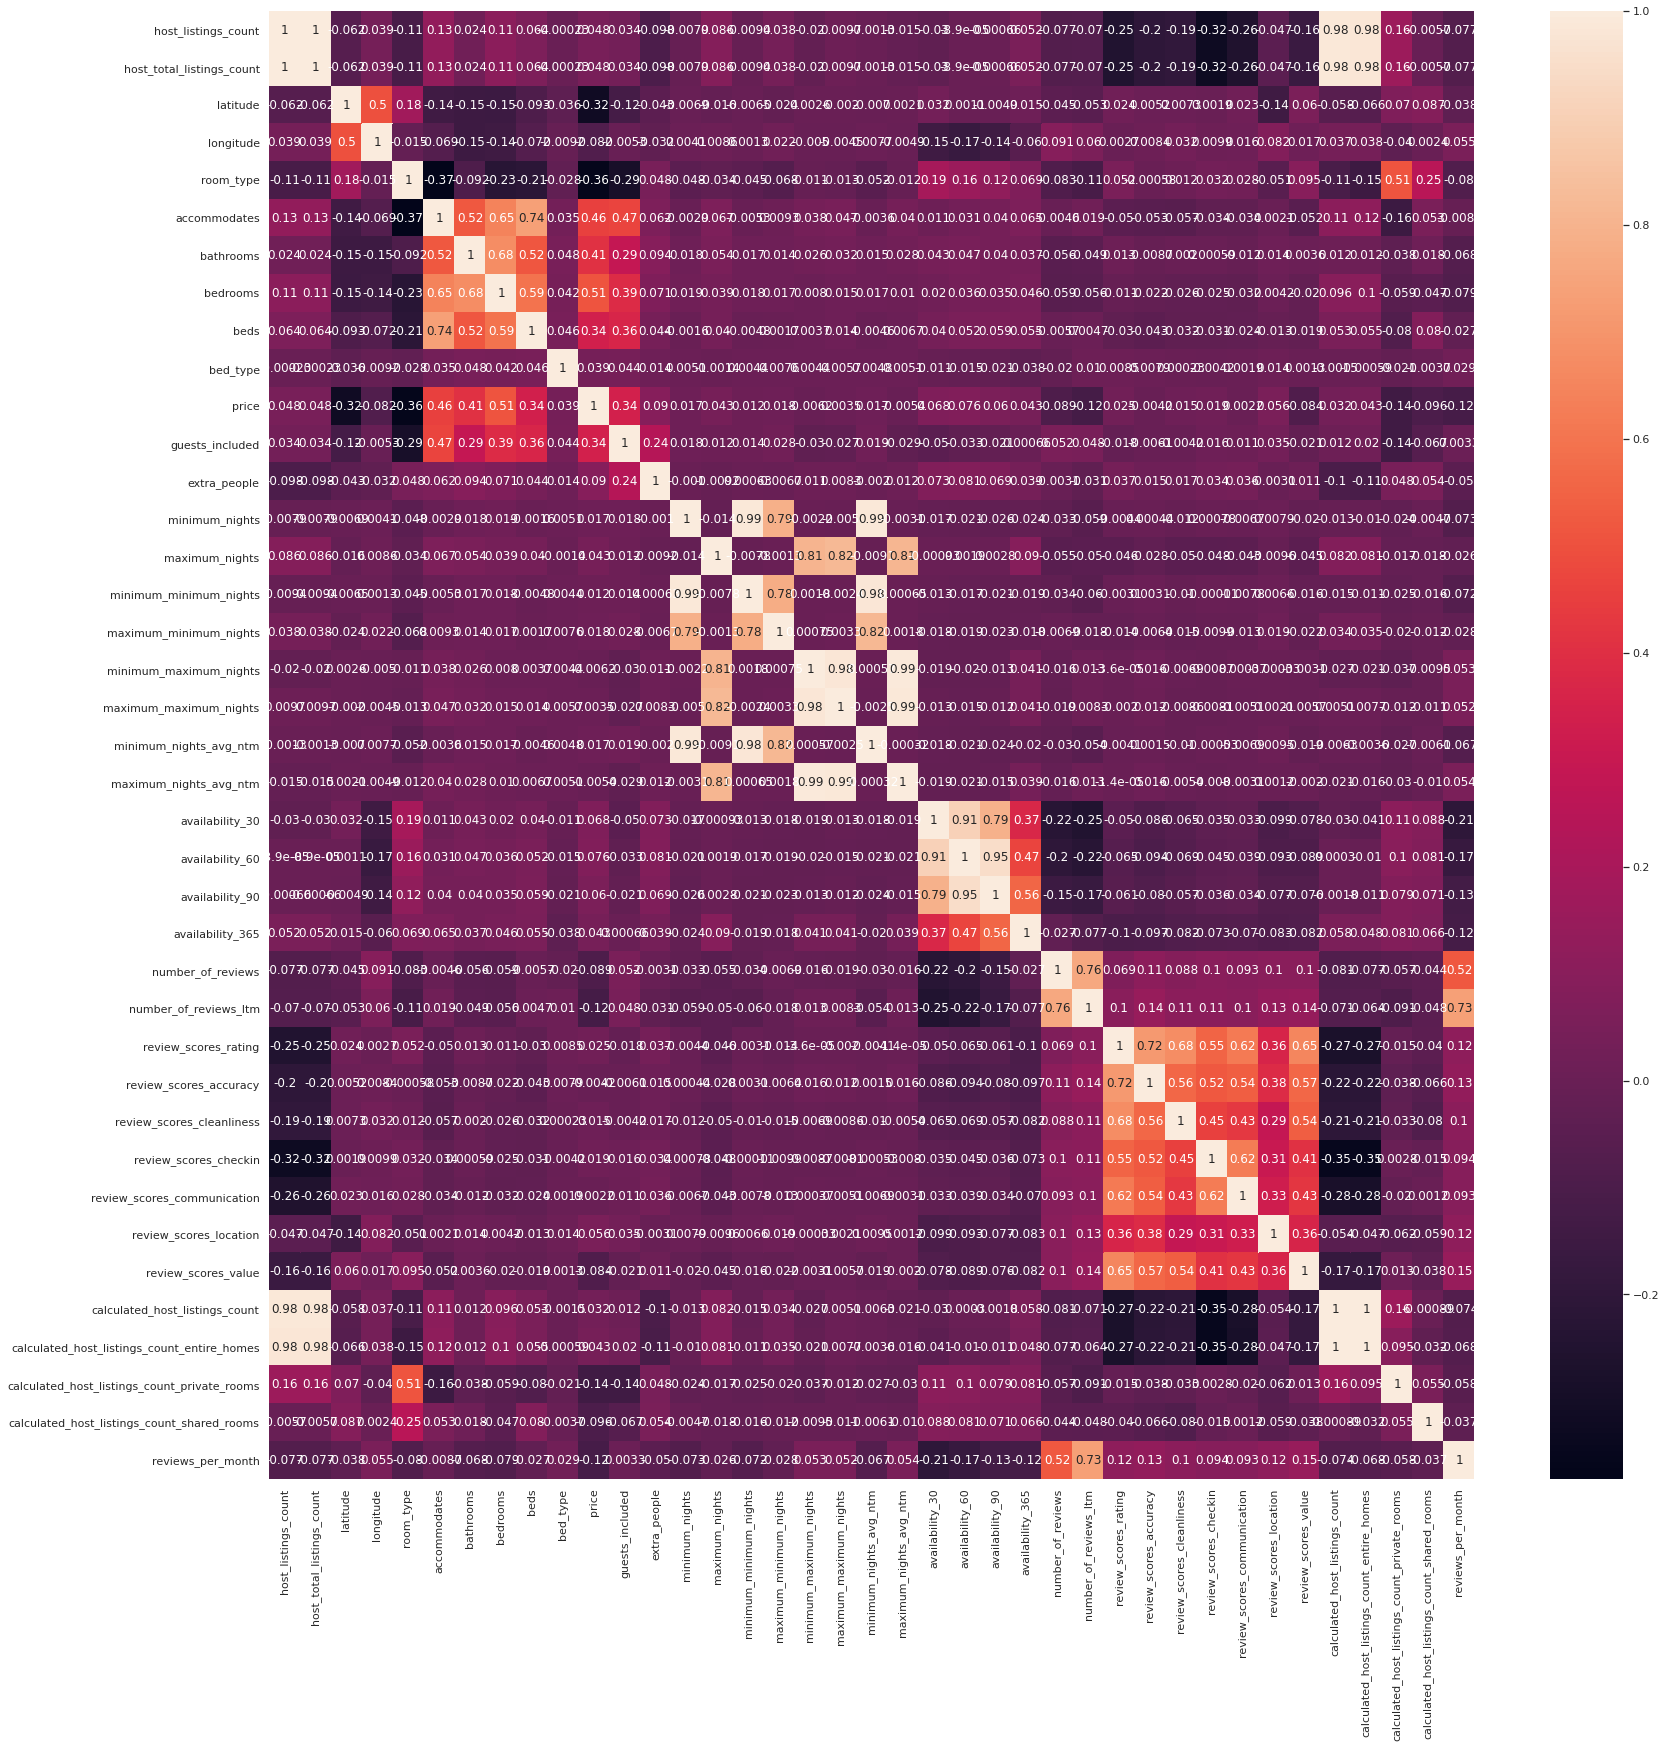

In [0]:
import seaborn as sns
plt.figure(figsize=(27,27))
sns.heatmap(ds.corr(), annot=True)

In [0]:
x = ds[['accommodates', 'bathrooms','bedrooms','beds', 'room_type']]
y = ds["price"]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1500, verbose=1, criterion='mse')
rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    5.8s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=1, warm_start=False)

In [0]:
pred = rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    0.5s finished
